# Occupational Outlook for jobs in Kentucky through 2032

##### Initialize the Environment:

##### Virtual Environment Commands

| Command | Linux/Mac | GitBash |
| ------- | --------- | ------- |
| Create | `python3 -m venv venv` | `python -m venv venv` |
| Activate | `source venv/bin/activate` | `source venv/Scripts/activate` |
| Install | `pip install -r requirements.txt` | `pip install -r requirements.txt` |
| Deactivate | `deactivate` | `deactivate` |

### **Project Overview**
**Objective:** Determine which Occupations and specific jobs, in Kentucky, will have the most growth through 2032.
Will show which occupations have the most new jobs and which occupations have the greatest growth.
Will also analyze where the growth in the computer and software industry compares the growth in other Kentucky industries. 

**Data Source:** https://kystats.ky.gov/ &nbsp;&nbsp;&nbsp; [Kentucky Center for Statistics](https://bit.ly/OccOutData-25)  
https://bit.ly/OccOutData-25  

In [1]:
import pandas as pd
import matplotlib
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from rich.console import Console
from rich.table import Table

**Load Data:** 
Link to the data from Kentucky Center for Statistics:
[Kentucky Center for Statistics](https://bit.ly/OccOutData-25)  
The dataset was in excel. I converted the dataset to csv and imported it. Unfortunately, I didn't realize there were 2 sheets in the workbook. The export combined both sheets into one csv file. I only discovered that my data was crap when I tried to plot it. I went back and imported the correct sheet...which had different columns, column names and data types. ***Live and Learn***!

In [2]:
ky_jobs = pd.read_excel('2022-2032_Occupational_Outlook.xlsx')

**Initial Check:** Display the first few rows and basic information about the dataset, noting
column names, types, and missing values.

In [3]:
# Display the first few rows of the original DataFrame
print("Head of the original DataFrame:")
print(ky_jobs.head())

# Display the last few rows of the original DataFrame
print("\nTail of the original DataFrame:")
print(ky_jobs.tail())

Head of the original DataFrame:
       Area                   Occupational Title  \
0  Kentucky             Total All Occupations      
1  Kentucky            Management Occupations      
2  Kentucky                     Chief Executives   
3  Kentucky      General and Operations Managers   
4  Kentucky  Advertising and Promotions Managers   

  Standard Occupational Classification (SOC) System Code  \
0                                            00-0000       
1                                            11-0000       
2                                            11-1011       
3                                            11-1021       
4                                            11-2011       

  2022 Estimated Employment 2032 Projected Employment  Change  Percent Change  \
0                 2,049,528                 2,146,969  97,441            4.75   
1                   132,055                   142,022   9,967            7.55   
2                     3,830                     3,5

In [4]:
# Displaying the size and data types of our data
df_shape = ky_jobs.shape
print(f'The DataFrame has {df_shape[0]} rows and {df_shape[1]} columns! \n')
print(ky_jobs.info())


The DataFrame has 733 rows and 18 columns! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 18 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Area                                                        733 non-null    object 
 1   Occupational Title                                          733 non-null    object 
 2   Standard Occupational Classification (SOC) System Code      733 non-null    object 
 3   2022 Estimated Employment                                   733 non-null    object 
 4   2032 Projected Employment                                   733 non-null    object 
 5   Change                                                      733 non-null    object 
 6   Percent Change                                              733 non-null    float64
 7   Annual Change                               

In [5]:
# checking to see if any values are null in data 
print(ky_jobs.isnull().any().any())

True


In [6]:
# Getting a count of null values in each column  
ky_jobs.isnull().sum()

Area                                                            0
Occupational Title                                              0
Standard Occupational Classification (SOC) System Code          0
2022 Estimated Employment                                       0
2032 Projected Employment                                       0
Change                                                          0
Percent Change                                                  0
Annual Change                                                   0
Annualized Percent Growth                                       0
Exits                                                           0
Annual Exits                                                    0
Transfers                                                       0
Annual Transfers                                                0
Total Openings                                                  0
Annual Openings                                                 0
Typical Ed

In [7]:
#column names
ky_jobs.columns

Index(['Area', 'Occupational Title',
       'Standard Occupational Classification (SOC) System Code',
       '2022 Estimated Employment', '2032 Projected Employment', 'Change',
       'Percent Change', 'Annual Change', 'Annualized Percent Growth', 'Exits',
       'Annual Exits', 'Transfers', 'Annual Transfers', 'Total Openings',
       'Annual Openings', 'Typical Education Required for Entry',
       'Typical Work Experience Required in Related Occupation',
       'Typical On-the-Job Training Required to Achieve Competency'],
      dtype='object')

**Data Cleaning and Preparation:**  
**Feature Engineering:** The dataset included subtotals for SOC Major Groups, causing groupby calculations to double-count values. To address this, I identified rows with an SOC ending in "0000" as group subtotals. These rows were isolated to extract category names, which were then used to populate a new "Category" column. Finally, the subtotal rows were removed to ensure accurate calculations.

**Handle Missing Values:** 
Dropped all rows that formerly held the category name and subtotals. Dropped any rows that didn't have data in the Category field. By clearing these rows that were not needed, all null values were eliminated.

In [8]:
def clean_ky_jobs_data(df) -> pd.DataFrame:
    """
    Cleans the Kentucky jobs data by dropping specified columns, 
    removing commas from numeric columns, and converting.

    Parameters:
    df (pd.DataFrame): The original DataFrame containing the Kentucky jobs data.

    Returns:
    pd.DataFrame: The cleaned DataFrame.
    """
    # List of columns to drop by index
    cols_to_drop = [0, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, ]

    # Drop the specified columns
    df.drop(df.columns[cols_to_drop], axis=1, inplace=True)

    # Before I re-engineer the data I'm going to shorten/modify the column names to make my code cleaner 
    df.rename(columns={'Standard Occupational Classification (SOC) System Code':'SOC',
                        'Typical Education Required for Entry' : 'Education Required',
                        'Percent Change' : 'Percent Job Growth', 
                        'Change' : 'New Jobs'},inplace = True)

    # Remove commas from 'New Jobs' and 'Percent Job Growth' columns, convert to float, and then round to whole numbers
    df['New Jobs'] = df['New Jobs'].str.replace(',', '').astype(float).round().astype(int)
    df['Percent Job Growth'] = df['Percent Job Growth'].replace('%', '').astype(float).round(2)
    
    # Print the DataFrame info to verify changes
    print(df.info())

    return df


In [9]:
# Call the function to clean the data
ky_jobs = clean_ky_jobs_data(ky_jobs)
ky_jobs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Occupational Title  733 non-null    object 
 1   SOC                 733 non-null    object 
 2   New Jobs            733 non-null    int64  
 3   Percent Job Growth  733 non-null    float64
 4   Education Required  710 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 28.8+ KB
None


,Occupational Title,SOC,New Jobs,Percent Job Growth,Education Required
0,Total All Occupations,00-0000,97441,4.75,NaN
1,Management Occupations,11-0000,9967,7.55,NaN
2,Chief Executives,11-1011,-294,-7.68,Bachelor's degree
3,General and Operations Managers,11-1021,3203,6.24,Bachelor's degree
4,Advertising and Promotions Managers,11-2011,11,2.41,Bachelor's degree


In [10]:
def new_category_from_rows(df) -> pd.DataFrame:
    """
    This is the added feature to the data frame
    Modifies the Kentucky jobs data by mapping data from the 'SOC' column to a new 'Category' column.

    Parameters:
    df (pd.DataFrame): The original DataFrame containing the Kentucky jobs data.

    Returns:
    pd.DataFrame: The cleaned DataFrame.
    """
    #Identified all rows that had "0000" at the end of the SOC column and stored them in a dateframe
    categories = df[df['SOC'].str.endswith('0000')]

    # Create a category_mapping dictionary using the first 2 digits of the SOC column
    category_mapping = dict(zip(categories['SOC'].astype(str).str[:2], categories['Occupational Title']))

    # Create a new column with the first 2 digits of the SOC column
    df['SOC 2'] = df['SOC'].astype(str).str[:2]

    # Map the occupational title to the Category column using the first 2 digits of the SOC column
    df['Category'] = df['SOC 2'].map(category_mapping)

    # Deletes all rows where the SOC column ends with "0000"
    df = df[~df['SOC'].astype(str).str.endswith('0000')]

    # Delete all rows without data in the new Category Column
    df = df.dropna(subset=['Category'])
    print("ky_jobs DataFrame after deleting rows without data in Category column:")

    # Move new Category column to be in relevant location and reset the index
    column_to_move = df.pop('Category')
    df.insert(1, 'Category', column_to_move)
    df = df.reset_index(drop=True)

    # Display the final DataFrame
    df

    return df


In [11]:
# Call the function to clean the data
ky_jobs = new_category_from_rows(ky_jobs)
ky_jobs

ky_jobs DataFrame after deleting rows without data in Category column:


,Occupational Title,Category,SOC,New Jobs,Percent Job Growth,Education Required,SOC 2
0,Chief Executives,Management Occupations,11-1011,-294,-7.68,Bachelor's degree,11
1,General and Operations Managers,Management Occupations,11-1021,3203,6.24,Bachelor's degree,11
2,Advertising and Promotions Managers,Management Occupations,11-2011,11,2.41,Bachelor's degree,11
3,Marketing Managers,Management Occupations,11-2021,150,6.54,Bachelor's degree,11
4,Sales Managers,Management Occupations,11-2022,405,4.96,Bachelor's degree,11
...,...,...,...,...,...,...,...
705,Stockers and Order Fillers,Transportation and Material Moving Occupations,53-7065,6126,12.10,High school diploma or equivalent,53
706,Gas Compressor and Gas Pumping Station Operators,Transportation and Material Moving Occupations,53-7071,2,1.32,High school diploma or equivalent,53
707,"Pump Operators, Except Wellhead Pumpers",Transportation and Material Moving Occupations,53-7072,7,8.05,High school diploma or equivalent,53
708,Refuse and Recyclable Material Collectors,Transportation and Material Moving Occupations,53-7081,28,1.04,No formal educational credential,53


**Exploratory Data Analysis(EDA)**

In [12]:
ky_jobs

,Occupational Title,Category,SOC,New Jobs,Percent Job Growth,Education Required,SOC 2
0,Chief Executives,Management Occupations,11-1011,-294,-7.68,Bachelor's degree,11
1,General and Operations Managers,Management Occupations,11-1021,3203,6.24,Bachelor's degree,11
2,Advertising and Promotions Managers,Management Occupations,11-2011,11,2.41,Bachelor's degree,11
3,Marketing Managers,Management Occupations,11-2021,150,6.54,Bachelor's degree,11
4,Sales Managers,Management Occupations,11-2022,405,4.96,Bachelor's degree,11
...,...,...,...,...,...,...,...
705,Stockers and Order Fillers,Transportation and Material Moving Occupations,53-7065,6126,12.10,High school diploma or equivalent,53
706,Gas Compressor and Gas Pumping Station Operators,Transportation and Material Moving Occupations,53-7071,2,1.32,High school diploma or equivalent,53
707,"Pump Operators, Except Wellhead Pumpers",Transportation and Material Moving Occupations,53-7072,7,8.05,High school diploma or equivalent,53
708,Refuse and Recyclable Material Collectors,Transportation and Material Moving Occupations,53-7081,28,1.04,No formal educational credential,53


In [13]:
def summarize_new_job_info(df) -> pd.DataFrame:
    """
    Calculates and summarizes the total, mean, and median number of jobs that will be added between 2022 and 2032 as
    represented in the change column from a Kentucky Employment dataset.
    

    Parameters:
        ky_jobs (pandas.DataFrame): The Kentucky Employment dataset containing a 
                                         'New Jobs' column.

    Returns:
        str: A formatted string summarizing the total, mean (rounded to 2 decimal places),
             and median number of new jobs represented in the change column.
    """
    # Calculate total, mean, and median change
    change_sum = df['New Jobs'].sum().round(0)
    change_mean = df['New Jobs'].mean().round(0)
    change_median = df['New Jobs'].median()
    change_min = df['New Jobs'].min()
    change_max = df['New Jobs'].max()
    max_row_index = df['New Jobs'].idxmax()
    max_row_index_perc = df['Percent Job Growth'].idxmax()
    soc_with_most_jobs = df.loc[max_row_index, 'Occupational Title']
    soc_with_highest_percent = df.loc[max_row_index_perc, 'Occupational Title']


    # Return a formatted string
    return (f"The total number of new jobs is {change_sum}.\n"
            f"The mean number of new jobs is {change_mean}.\n"
            f"The median number of new jobs is {change_median}.\n"
            f"The minimum number of new jobs is {change_min}.\n"
            f"The maximum number of new jobs is {change_max}.\n"
            f"The occupation with the most new jobs through 2032 is {soc_with_most_jobs}.\n"
            f"The occupation with the greatest %-age of new jobs is {soc_with_highest_percent}.")

           

In [14]:
# Calling the function from above and printing it.  
descriptive_statistics = summarize_new_job_info(ky_jobs)

print(descriptive_statistics)

The total number of new jobs is 93995.
The mean number of new jobs is 132.0.
The median number of new jobs is 15.0.
The minimum number of new jobs is -3208.
The maximum number of new jobs is 6590.
The occupation with the most new jobs through 2032 is Laborers and Freight, Stock, and Material Movers, Hand.
The occupation with the greatest %-age of new jobs is Nurse Practitioners.


In [15]:
def calculate_category_stats(df) -> pd.DataFrame:
    """
    Group data by Category and caclulates statistics for Total_New_Jobs, Mean_New_Jobs, and Mean_Percent_Job_Growth    
    
    Parameters:
    df (pd.DataFrame): The cleaned DataFrame containing the Kentucky jobs data.

    Returns: pd.DataFrame: The DataFrame containing the calculated statistics.
    """
    category_stats = (
        df.groupby('Category')
        .agg(
            Total_New_Jobs=('New Jobs', 'sum'),
            Mean_New_Jobs=('New Jobs', 'mean'),
            Mean_Percent_Job_Growth=('Percent Job Growth', 'mean')
        )
        .reset_index()
    )

    # Apply display formatting
    category_stats['Mean_New_Jobs'] = category_stats['Mean_New_Jobs'].apply(lambda x: f"{x:,.2f}")
    category_stats['Mean_Percent_Job_Growth'] = category_stats['Mean_Percent_Job_Growth'].apply(lambda x: f"{x:.1f}%")
    
    return category_stats
    

 

In [16]:
def display_category_stats(stats: pd.DataFrame) -> None:
    """
    Displays the category statistics in a table using the rich library.

    Parameters:
    stats (pd.DataFrame): The DataFrame containing the category statistics.
    """
   
    console = Console()

    #table = Table(title="Category Statistics")
    table = Table(show_header=True, header_style="bold blue")

    # Add columns with bold headers
    table.add_column("Category", justify="left", style="bold")
    table.add_column("Total New Jobs", justify="right")
    table.add_column("Mean New Jobs", justify="right", style="cyan")
    table.add_column("Job Growth", justify="right", style="magenta")

    # Add rows from the DataFrame
    for _, row in stats.iterrows():
        table.add_row(
            row['Category'],
            f"{row['Total_New_Jobs']}",
            f"{row['Mean_New_Jobs']}",
            f"{row['Mean_Percent_Job_Growth']}%"
        )

    console.print(table)    
#



In [17]:
def plot_top_5_category_job_growth(ky_jobs: pd.DataFrame) -> None:
    """
    Plots a bar chart of the top 5 categories in job growth percent.

    Parameters:
    ky_jobs (pd.DataFrame): The cleaned DataFrame containing the Kentucky jobs data.
    """
    import matplotlib.pyplot as plt

    # Calculate the percent job growth for each category
    category_job_growth = ky_jobs.groupby('Category')['Percent Job Growth'].mean()

    # Sort the values in descending order
    category_job_growth = category_job_growth.sort_values(ascending=False)

    # Select the top 5 categories
    top_5_category_job_growth = category_job_growth.head(5)

    # Modify the 'Category' column for plotting
    split_labels = ['\n'.join(label.split(' ', 3)) for label in top_5_category_job_growth.index]

    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(split_labels, top_5_category_job_growth, color='pink')

    # Emphasize the highest value with the bar being orange
    bars[0].set_color('Orange')

    # Place values on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
                ha='center', va='bottom', fontsize=14)

    plt.xticks(rotation=0)
    plt.title('Top 5 Categories in Job Growth %', fontsize=16)
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Percent Growth', fontsize=14)
    plt.tight_layout()  # Adjust layout to make room for the rotated labels
    plt.show()

 
    """
    import matplotlib.pyplot as plt

    # Calculate the percent job growth for each category
    category_job_growth = ky_jobs.groupby('Category')['Percent Job Growth'].mean()

    # Sort the values in descending order
    category_job_growth = category_job_growth.sort_values(ascending=False)

    # Select the top 5 categories
    top_5_category_job_growth = category_job_growth.head(5)

    # Modify the 'Category' column for plotting
    split_labels = ['\n'.join(label.split(' ', 3)) for label in top_5_category_job_growth.index]

    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(split_labels, top_5_category_job_growth, color='pink')

    # Emphasize the highest value with the bar being orange
    bars[0].set_color('Orange')

    # Place values on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
                ha='center', va='bottom', fontsize=14)

    plt.xticks(rotation=1)
    plt.title('Top 5 Categories in Job Growth %', fontsize=16)
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Percent Growth', fontsize=14)
    plt.tight_layout()  # Adjust layout to make room for the rotated labels
    plt.show()
    """


In [18]:
def plot_top_5_category_new_jobs(ky_jobs) -> None:
    """
    Plots a bar chart of the top 5 categories in new jobs.

    Parameters:
    ky_jobs (pd.DataFrame): The cleaned DataFrame containing the Kentucky jobs data.
    """

    import matplotlib.pyplot as plt

    # Calculate the percent job growth for each category
    category_new_jobs = ky_jobs.groupby('Category')['New Jobs'].sum()

    # Sort the values in descending order
    category_new_jobs = category_new_jobs.sort_values(ascending=False)

    # Select the top 5 categories
    top_5_category_new_jobs = category_new_jobs.head(5)

    # Modify the 'Category' column for plotting
    split_labels = ['\n'.join(label.split(' ', 3)) for label in top_5_category_new_jobs.index]

    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(split_labels, top_5_category_new_jobs, color='pink')

    # Save the original column to a temporary variable
    # original_category = ky_jobs['Category'].copy()

    # Modify the 'Category' column for plotting
    #split_labels = ['\n'.join(label.split(' ', 3)) for label in top_5_category_job_growth.index]
    #ky_jobs['Category'] = ky_jobs['Category'].apply(lambda x: '\n'.join(x.split(' ', 2))) 
    # Emphasize the highest value with the bar being orange
    bars[0].set_color('Orange')

    # Place values on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', 
                ha='center', va='bottom', fontsize=14)

    plt.xticks(rotation=0)
    plt.title('Top 5 Categories in New Jobs (2032)', fontsize=16)
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Number of Jobs', fontsize=14)
    plt.tight_layout()  # Adjust layout to make room for the rotated labels
    plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Occupational Title  733 non-null    object 
 1   SOC                 733 non-null    object 
 2   New Jobs            733 non-null    int64  
 3   Percent Job Growth  733 non-null    float64
 4   Education Required  710 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 28.8+ KB
None
ky_jobs DataFrame after deleting rows without data in Category column:
The total number of new jobs is 93995.
The mean number of new jobs is 132.0.
The median number of new jobs is 15.0.
The minimum number of new jobs is -3208.
The maximum number of new jobs is 6590.
The occupation with the most new jobs through 2032 is Laborers and Freight, Stock, and Material Movers, Hand.
The occupation with the greatest %-age of new jobs is Nurse Practitioners.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                                                      ┃ Total New Jobs ┃ Mean New Jobs ┃ Job Growth ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Architecture and Engineering Occupations                      │           2249 │         70.28 │      4.4%% │
│ Arts, Design, Entertainment, Sports, and Media Occupations    │            737 │         19.92 │      3.1%% │
│ Building and Grounds Cleaning and Maintenance Occupations     │           3064 │        383.00 │      5.1%% │
│ Business and Financial Operations Occupations                 │           5202 │        179.38 │      5.2%% │
│ Community and Social Service Occupations                      │           3364 │        197.88 │      8.6%% │
│ Computer and Mathematical Occupations                         │           4355 │        241.94 │     12.4%% │
│ Construction and Extraction Occupations                       │           2761 │         55.22 │     -1.8%% │
│ Educational Instruction and Library Occupations               │           1838 │         29.65 │      3.9%% │
│ Farming, Fishing, and Forestry Occupations                    │             62 │          6.20 │     -2.2%% │
│ Food Preparation and Serving Related Occupations              │           8764 │        515.53 │      6.2%% │
│ Healthcare Practitioners and Technical Occupations            │          12753 │        205.69 │      8.3%% │
│ Healthcare Support Occupations                                │          10449 │        614.65 │      8.9%% │
│ Installation, Maintenance, and Repair Occupations             │           6062 │        134.71 │      4.0%% │
│ Legal Occupations                                             │            555 │        138.75 │      3.0%% │
│ Life, Physical, and Social Science Occupations                │            947 │         24.28 │      5.2%% │
│ Management Occupations                                        │           9796 │        288.12 │      5.4%% │
│ Office and Administrative Support Occupations                 │          -9754 │       -207.53 │     -6.1%% │
│ Personal Care and Service Occupations                         │           2841 │        129.14 │      7.2%% │
│ Production Occupations                                        │           3605 │         40.97 │     -2.4%% │
│ Protective Service Occupations                                │            926 │         51.44 │      3.0%% │
│ Sales and Related Occupations                                 │            231 │         12.83 │      0.1%% │
│ Transportation and Material Moving Occupations                │          23188 │        644.11 │      7.6%% │
└───────────────────────────────────────────────────────────────┴────────────────┴───────────────┴────────────┘

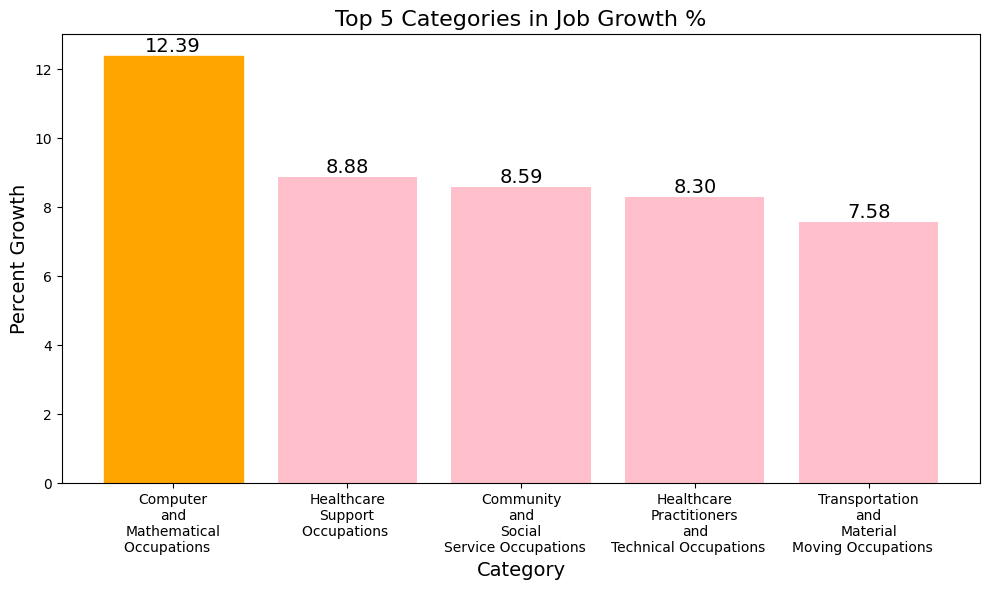

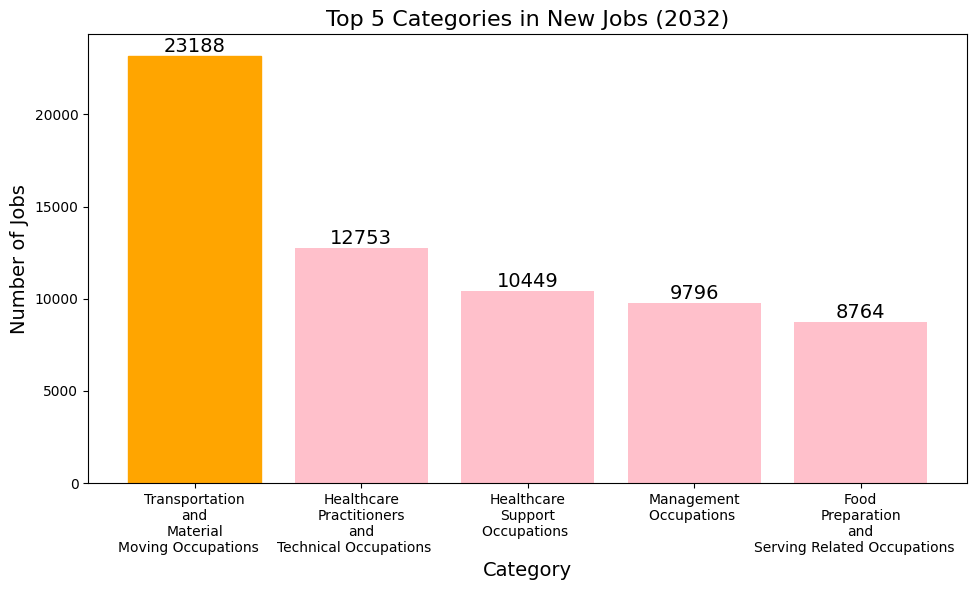

In [19]:
def main() -> None:
    """
    The main function for the Kentucky Employment data analysis.
    """
    # Load the data
    ky_jobs = pd.read_excel('2022-2032_Occupational_Outlook.xlsx')

    # Clean the data
    ky_jobs = clean_ky_jobs_data(ky_jobs)

    # Add a new category column
    ky_jobs = new_category_from_rows(ky_jobs)

    # Calculate and summarize new job information
    descriptive_statistics = summarize_new_job_info(ky_jobs)
    print(descriptive_statistics)

    # Calculate category statistics
    category_stats = calculate_category_stats(ky_jobs)

    # Display category statistics
    display_category_stats(category_stats)

    # Plot the top 5 categories in job growth percent
    plot_top_5_category_job_growth(ky_jobs)

    # Plot the top 5 categories in new jobs
    plot_top_5_category_new_jobs(ky_jobs)

if __name__ == "__main__":
    main()